# **Aprendizaje no supervisado**
## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [3]:
#Se carga el DataSet
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

In [4]:
#Experimento 1
pca = PCA()
datos_pca = pca.run(data)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [5]:
print("% de varianza descrita por cada caracteristica")
print(pca.valores_propios/np.sum(pca.valores_propios) * 100)

% de varianza descrita por cada caracteristica
[40.2421075  14.92319678 12.05966259  9.55476403  0.0856073   0.78320024
  6.62181391  4.33682036  6.02717076  5.36565652]


(442, 2)


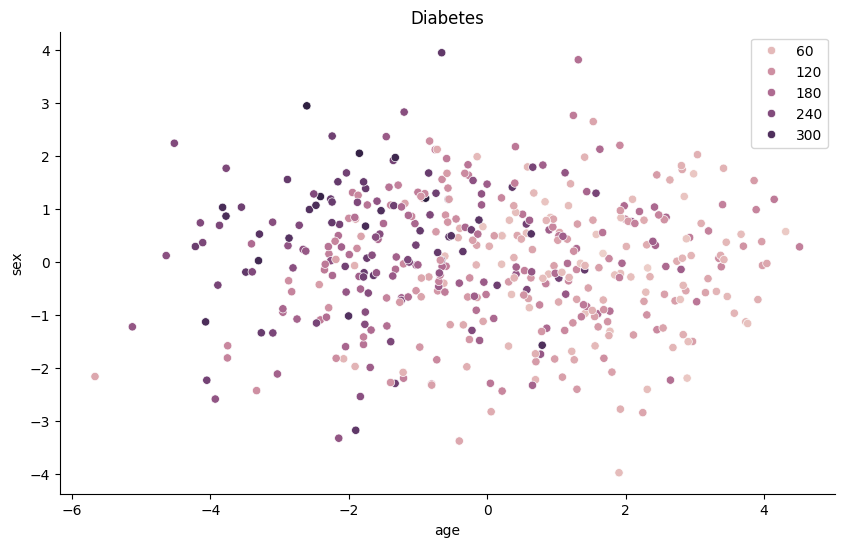

In [6]:
pca.dibujar("Diabetes", diabetes.feature_names[0:2], target, datos_pca)

##**Taller # 1**

* Utilizar dataset blue jays
* Realizar analisis bivariado todos contra todos tal como se explicó
* Interpretar resultados del analisis bivariado
* Calcule la matriz de covarianza y sus valores y vectores propios (discuta los resultados con su grupo)
* Determine cuantos y cuales componentes son necesarios para describir el 90% de la varianza de los datos

## **SOLUCION**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

try:
    blue_jays = pd.read_csv('blue_jays.csv')
except FileNotFoundError:
    print("'blue_jays.csv'No se encuentra.")
    exit()


**Eliminar columnas no numéricas**

In [28]:
numeric_cols = blue_jays.select_dtypes(include=np.number).columns
blue_jays_numeric = blue_jays[numeric_cols]



***Matriz de covarianza***

In [35]:
cov_matrix = blue_jays_numeric.cov()
print("Matriz de Covarianza:\n", cov_matrix)



Matriz de Covarianza:
                 bill_depth_mm  bill_width_mm  bill_length_mm  head_length_mm  \
bill_depth_mm        0.152248       0.056229        0.253296        0.341562   
bill_width_mm        0.056229       0.284618        0.185944        0.302935   
bill_length_mm       0.253296       0.185944        1.382099        1.503559   
head_length_mm       0.341562       0.302935        1.503559        2.463638   
body_mass_g          0.879464       0.736828        2.296619        4.709377   
skull_size_mm        0.088184       0.116841        0.121306        0.960268   

                body_mass_g  skull_size_mm  
bill_depth_mm      0.879464       0.088184  
bill_width_mm      0.736828       0.116841  
bill_length_mm     2.296619       0.121306  
head_length_mm     4.709377       0.960268  
body_mass_g       22.721393       2.414333  
skull_size_mm      2.414333       0.839314  


***Vectores propios***

In [36]:
valoresp, vectoresp = np.linalg.eig(cov_matrix)

print("\nValores propios:\n", valoresp)
print("\nVectores propios:\n", vectoresp)



Valores propios:
 [2.43991220e+01 2.29236306e+00 8.15169027e-01 2.44139906e-01
 9.25132232e-02 2.79516378e-06]

Vectores propios:
 [[ 3.96155230e-02 -8.98955208e-02  6.76378245e-02 -5.77088162e-02
  -9.91183080e-01  5.70543991e-04]
 [ 3.36238425e-02 -8.14750304e-02 -1.95565347e-02 -9.93775593e-01
   6.52587322e-02  4.08710414e-04]
 [ 1.11595883e-01 -6.11662426e-01  5.18544435e-01  5.00460941e-02
   9.27388770e-02  5.77427047e-01]
 [ 2.19929745e-01 -7.28830670e-01 -2.80503677e-01  7.58264347e-02
   5.10029831e-02 -5.77411029e-01]
 [ 9.61627350e-01  2.57413727e-01  9.19828457e-02  1.09828047e-02
   2.07254470e-02 -5.58377455e-05]
 [ 1.08398127e-01 -1.17020166e-01 -7.99381748e-01  2.65496024e-02
  -4.08173092e-02  5.77212278e-01]]


 90% de la ***varianza***

In [39]:
varianza_explicada = valoresp / np.sum(valoresp)
varianza_acumulada = np.cumsum(varianza_explicada)

n_components_90 = np.argmax(varianza_acumulada >= 0.9) + 1

print(f"\ncomponentes para explicar el 90% de la varianza: {n_components_90}")
print(f"Componentes: {list(blue_jays_numeric.columns[:n_components_90])}")

print(f"\nProporción de Varianza Explicada por componente: {varianza_explicada}")
print(f"\nProporción de Varianza Explicada Acumulada: {varianza_acumulada}")


componentes para explicar el 90% de la varianza: 2
Componentes: ['bill_depth_mm', 'bill_width_mm']

Proporción de Varianza Explicada por componente: [8.76301057e-01 8.23308383e-02 2.92770158e-02 8.76835067e-03
 3.32263740e-03 1.00389062e-07]

Proporción de Varianza Explicada Acumulada: [0.87630106 0.9586319  0.98790891 0.99667726 0.9999999  1.        ]


***Imprimir Bivarianza***

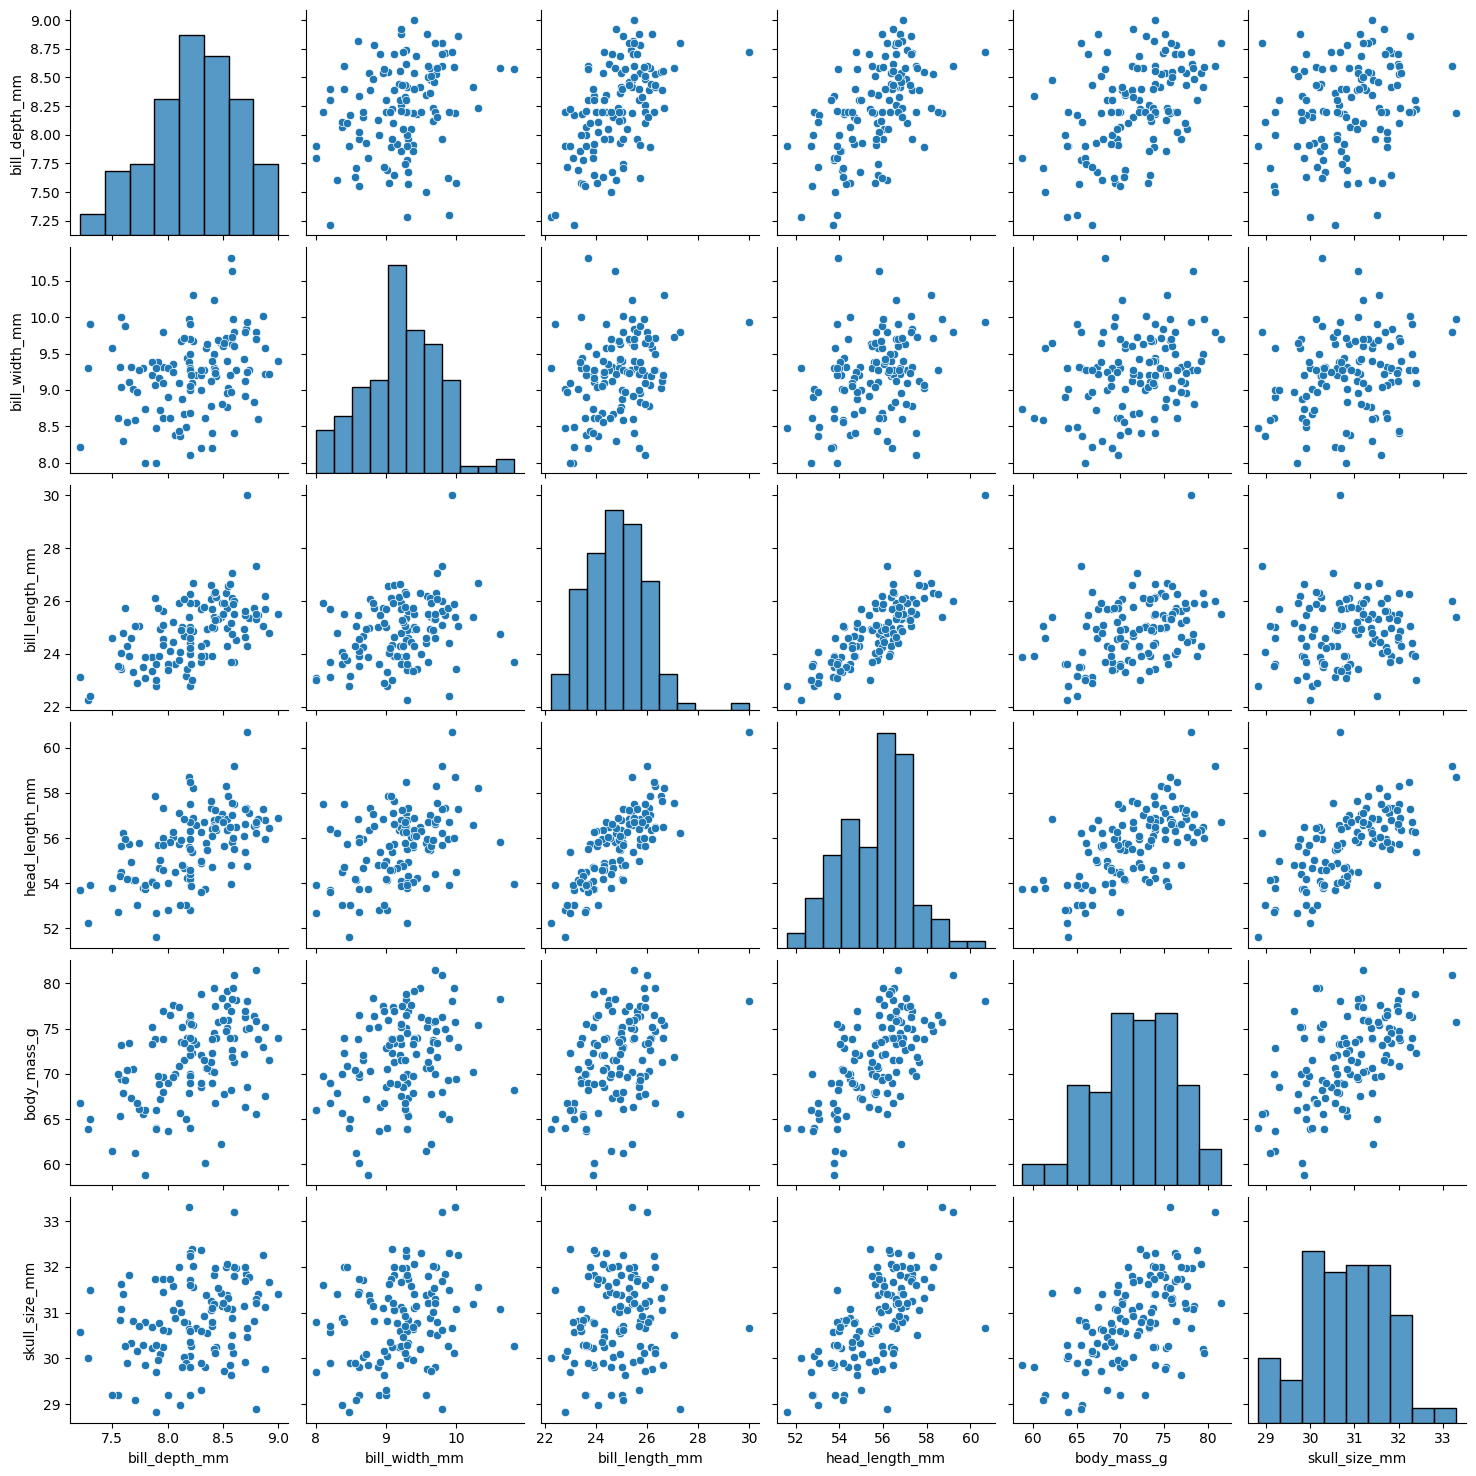

In [31]:
sns.pairplot(blue_jays_numeric)
plt.show()